# Unsupervised Machine Learning 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [17]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [18]:
data = pd.read_csv(r"C:\Users\Lenovo\Documents\INDE DATA\firstfulldatasetINDIA.csv")
#We make a copy of the file and work on it
data = data.copy()
data.head()

,Sector,State,State-District,Household size,Household type,Religion,Social group,Whether owns any non-agricultural enterprise,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),...,electrical and lighting accessories_365days,equipment for recreation_365days,furniture and fixtures_365days,jewellery and ornaments_365days,kitchen equipment_365days,miscellaneous durables_365days,other machines for household work_365days,productive equipment_365days,sports and medical equipment_365days,transport equipment_365days
0,Rural,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,Islam,others,no,no,9000.0,...,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rural,JAMMU & KASHMIR,Punch,5,Rural : non-agriculture,Islam,others,no,no,10000.0,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rural,JAMMU & KASHMIR,Punch,6,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000.0,...,NaN,NaN,300.0,NaN,NaN,200.0,NaN,NaN,NaN,NaN
3,Rural,JAMMU & KASHMIR,Punch,8,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rural,JAMMU & KASHMIR,Punch,9,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500.0,...,NaN,NaN,700.0,NaN,NaN,400.0,NaN,NaN,NaN,NaN


In [19]:
#data = data.sample(frac=.1, axis=0, random_state=0)

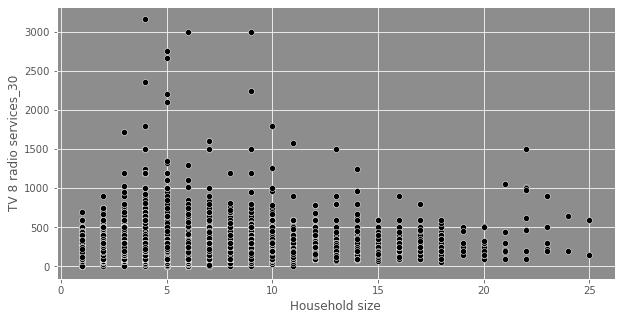

In [20]:
sns.scatterplot(data=data, x='Household size', y='TV 8 radio services_30', color='black')
plt.show()

There are clustering tendencies in the dataset, let's build clustering models to identify these clusters.

## Modeling

Assign modeling variables to X

In [21]:
X=data[['Household size','TV 8 radio services_30']]
X = X.fillna(0)

In [22]:
data['TV 8 radio services_30'].unique()

array([      nan, 2.000e+02, 2.300e+02, 2.200e+02, 2.500e+02, 1.250e+02,
       2.170e+02, 1.500e+02, 1.300e+02, 3.200e+02, 2.800e+02, 3.500e+02,
       3.000e+02, 5.000e+02, 2.100e+02, 6.000e+02, 7.000e+02, 2.700e+02,
       2.350e+02, 1.800e+02, 2.600e+02, 1.000e+02, 3.350e+02, 1.350e+02,
       2.400e+02, 1.200e+02, 1.700e+02, 8.000e+02, 1.600e+02, 2.040e+02,
       2.220e+02, 3.900e+02, 6.500e+02, 2.450e+02, 3.550e+02, 4.000e+02,
       4.500e+02, 8.500e+02, 3.600e+02, 2.550e+02, 2.490e+02, 9.000e+02,
       1.800e+03, 6.490e+02, 4.400e+02, 2.750e+02, 7.800e+02, 2.250e+02,
       5.810e+02, 3.300e+02, 3.250e+02, 3.100e+02, 3.400e+02, 3.650e+02,
       2.850e+02, 4.100e+02, 5.100e+02, 8.350e+02, 3.050e+02, 3.700e+02,
       1.020e+03, 1.830e+02, 3.800e+02, 1.100e+02, 9.000e+01, 5.000e+01,
       0.000e+00, 1.400e+02, 8.500e+01, 1.670e+02, 1.150e+02, 1.250e+03,
       4.300e+02, 8.000e+01, 3.750e+02, 1.750e+02, 5.520e+02, 1.500e+03,
       1.650e+02, 5.150e+02, 7.000e+01, 2.410e+02, 

### Clustering with KMeans

In [23]:
#Creation of loop to find the right cluster
from sklearn.cluster import KMeans

dict_model={}
for i in range (2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    key="kmeans"+str(i)
    dict_model[key] = kmeans.labels_

In [24]:
dict_model

{'kmeans2': array([1, 1, 0, ..., 0, 0, 0]),
 'kmeans3': array([1, 1, 0, ..., 0, 0, 0]),
 'kmeans4': array([1, 1, 0, ..., 0, 0, 0]),
 'kmeans5': array([0, 0, 3, ..., 3, 3, 3]),
 'kmeans6': array([1, 1, 0, ..., 0, 2, 0]),
 'kmeans7': array([0, 0, 5, ..., 5, 1, 5]),
 'kmeans8': array([1, 1, 5, ..., 5, 0, 5]),
 'kmeans9': array([1, 1, 0, ..., 0, 7, 7]),
 'kmeans10': array([0, 0, 1, ..., 1, 2, 8])}

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

visualizer = KElbowVisualizer(estimator = kmeans, k = (2,11), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

In [73]:
# fitting KMeans with 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X) #y-pred=kmeans.labels_

data['kmeans_cluster'] = kmeans.labels_
k_centers = kmeans.cluster_centers_

k_centers



array([[  4.72515723, 153.69842767],
       [  4.8398289 ,   1.72005703],
       [  5.02611684, 297.45910653]])

In [ ]:

# plot clusters on dataset plot 
#  dans le scatter plot des observations, les deux dimensions x et y- hue: les 3 clusters, la palette donc 3 couleur
# dans le scatter des centroids: les centroids est un arrays, 1er colonne, les X, 2e colonne les Y

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Household size', y='TV 8 radio services_30', hue=y_kmeans, palette=['yellow', 'blue', 'red'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

In [ ]:

# plot clusters on dataset plot 
#  dans le scatter plot des observations, les deux dimensions x et y- hue: les 3 clusters, la palette donc 3 couleur
# dans le scatter des centroids: les centroids est un arrays, 1er colonne, les X, 2e colonne les Y

fig, ax = plt.subplots()
plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_kmeans)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
plt.scatter(k_centers[:, 0], k_centers[:, 1], c='red', s=20, alpha=0.5)
plt.show()


### Clustering with DBScan

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:

k=0
for eps in range (1,5):
    for min_samples in range (2,5):
        k=k+1
        db = DBSCAN(eps=eps/100, min_samples=min_samples)
        print("db"+str(k))
        print(db)
        db.fit(X)
        key3="db"+str(k)
        dict_model[key3] = db.labels_
        cl=len(np.unique(db.labels_))
        print("number of clusters: ", cl )
    


dict_model

In [ ]:
sns.scatterplot(data=data, x='Household size', y='TV 8 radio services_30', hue=y_dbs, palette=['yellow', 'blue'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)



eps_d=[]
for eps in range (1,20):
    for min_samples in range (2,20):
        db = DBSCAN(eps=eps/100, min_samples=min_samples).fit(iris_pd)
        cl=len(np.unique(db.labels_))
        eps_d.append([eps/100,min_samples, cl])
    
        
eps_d
    
df_db=pd.DataFrame(eps_d, columns=["e","ms","cl"])
df_db["cl"].value_counts()

In [ ]:
# fitting to splot


dbs= DBSCAN(eps=0.01, min_samples=2)
dbs.fit(X)
y_dbs = dbs.labels_ #y-pred=kmeans.labels_
#cl=y_dbs.nunique() #nombre de labels

data['dbs_cluster'] = dbs.labels_

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_dbs, cmap='viridis')

plt.show()



In [ ]:
data['dbs_cluster'] = dbs.labels_
clusters = data['dbs_cluster'].reset_index()
clusters

###  Clustering WITH GAUSSIAN MIXTURE MODEL

In [ ]:
# find the optimal numbers of clusters with GAUSSIAN
from sklearn.mixture import GaussianMixture


for i in range (2,11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    key="gmm"+str(i)
    dict_model[key] = gmm.predict(X)

dict_model


In [ ]:
# Fitting Gaussian with 2 clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X)
y_gmm = gmm.predict(X)

data['gmm_cluster'] = gmm.predict(X)

# plot clusters on dataset plot
fig, ax = plt.subplots()
sns.scatterplot(data=X, x='Household size', y='TV 8 radio services_30', hue=y_gmm, cmap="plasma", ax=ax)
plt.show()

## Clustering with AgglomerativeClustering

In [ ]:
# find the optimal numbers of clusters for AC
from sklearn.cluster import AgglomerativeClustering

for i in range (2,7):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(X)
    key1="agc"+str(i)
    dict_model[key1] = agc.labels_



In [ ]:
from yellowbrick.cluster import KElbowVisualizer

agc = AgglomerativeClustering()

visualizer = KElbowVisualizer(estimator = agc, k = (2,6), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

In [ ]:
#AGGLOMEATIVECLUSTERING
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #3: so only 3 label
agc.fit_predict(X)
y_agglomerative=agc.labels_


plt.figure(figsize=(10, 7))  
plt.scatter(data=data, x='Household size', y='TV 8 radio services_30', c=y_agglomerative,  cmap='viridis') 
plt.xlabel("X1X1")
plt.ylabel("X2X2")

## Model Comparison

In [ ]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)


In [ ]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])
    

## Cluster analysis

In [ ]:
# check cluster distribution
data['kmeans_cluster'].value_counts()

In [ ]:
# assign cluster variables
cluster0 = data[data['kmeans_cluster']==0]
cluster1 = data[data['kmeans_cluster']==1]

In [ ]:
# Plot pickup peaks for cluster1
sns.heatmap(pd.crosstab(cluster0.religion, cluster0.state, normalize='columns'), cmap='coolwarm')
plt.show()

In [ ]:
# Plot pickup peaks for cluster1
sns.heatmap(pd.crosstab(cluster1.Hour, cluster1.Weekday, normalize='columns'), cmap='coolwarm')
plt.show()